# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/lorenzofontana/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [15]:
#your code here
import requests
r = requests.get('http://seanlahman.com/files/database/baseballdatabank-master_2016-03-02.zip')

In [18]:
type(r.content)
len(r.content)
r.content[0:100]

'PK\x03\x04\n\x00\x00\x00\x00\x00\x95\x05bH\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\t\x00baseballdatabank-master/UT\x05\x00\x01\xfb\xa7\xd6VPK\x03\x04\n\x00\x00\x00\x08\x00\x95\x05bHza\xff#\xfc\x01\x00\x00n\x03\x00\x00"\x00\t\x00basebal'

In [19]:
import zipfile, StringIO
z = zipfile.ZipFile(StringIO.StringIO(r.content))

In [26]:
print type(z)
print z.printdir()
z.extract('baseballdatabank-master/core/Salaries.csv')
z.extract('baseballdatabank-master/core/Teams.csv')

<class 'zipfile.ZipFile'>
File Name                                             Modified             Size
baseballdatabank-master/                       2016-03-02 00:44:42            0
baseballdatabank-master/README.txt             2016-03-02 00:44:42          878
baseballdatabank-master/core/                  2016-03-02 00:44:42            0
baseballdatabank-master/core/AllstarFull.csv   2016-03-02 00:44:42       208224
baseballdatabank-master/core/Appearances.csv   2016-03-02 00:44:42      5989686
baseballdatabank-master/core/AwardsManagers.csv 2016-03-02 00:44:42         8104
baseballdatabank-master/core/AwardsPlayers.csv 2016-03-02 00:44:42       246769
baseballdatabank-master/core/AwardsShareManagers.csv 2016-03-02 00:44:42        18188
baseballdatabank-master/core/AwardsSharePlayers.csv 2016-03-02 00:44:42       229613
baseballdatabank-master/core/Batting.csv       2016-03-02 00:44:42      6247523
baseballdatabank-master/core/BattingPost.csv   2016-03-02 00:44:42       716496
ba

'/Users/lorenzofontana/CS109_workspace/2014/homework/baseballdatabank-master/core/Teams.csv'

In [28]:
salaries = pd.read_csv('baseballdatabank-master/core/Salaries.csv')
teams = pd.read_csv('baseballdatabank-master/core/Teams.csv')
print salaries.head()
print teams.head()

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19     ...        
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   
3 NaN

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [30]:
salaries.describe()

,yearID,salary
count,25575.000000,2.557500e+04
mean,2000.374389,2.008563e+06
std,8.610604,3.315706e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.750000e+05
50%,2000.000000,5.500000e+05
75%,2008.000000,2.250000e+06
max,2015.000000,3.300000e+07


In [57]:
#your code here
salaries_gr = salaries.groupby(['teamID', 'yearID'])['salary'].sum().reset_index()
# if we don't use reset_index the returned object will not be a dataframe
print salaries_gr.head(50)
# to get multiple summarizing functions, use agg
salaries_gr_test = salaries.groupby(['teamID', 'yearID'])['salary'].agg([np.sum, np.mean]).reset_index()
print salaries_gr_test.head(50)

   teamID  yearID     salary
0     ANA    1997   31135472
1     ANA    1998   41281000
2     ANA    1999   55388166
3     ANA    2000   51464167
4     ANA    2001   47535167
5     ANA    2002   61721667
6     ANA    2003   79031667
7     ANA    2004  100534667
8     ARI    1998   32347000
9     ARI    1999   68703999
10    ARI    2000   81027833
11    ARI    2001   85082999
12    ARI    2002  102819999
13    ARI    2003   80657000
14    ARI    2004   69780750
15    ARI    2005   62329166
16    ARI    2006   59684226
17    ARI    2007   52067546
18    ARI    2008   66202712
19    ARI    2009   73115666
20    ARI    2010   60718166
21    ARI    2011   53639833
22    ARI    2012   73804833
23    ARI    2013   90132000
24    ARI    2014   97861500
25    ARI    2015   61834000
26    ATL    1985   14807000
27    ATL    1986   17102786
28    ATL    1987   16544560
29    ATL    1988   12728174
30    ATL    1989   11112334
31    ATL    1990   14555501
32    ATL    1991   18403500
33    ATL    1

In [58]:
type(salaries_gr)

pandas.core.frame.DataFrame

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [64]:
#your code here
teams_salaries = pd.merge(left = teams, right = salaries_gr, how = 'inner',
                         left_on = ['yearID', 'teamID'],
                         right_on = ['yearID', 'teamID'])
teams_salaries.sort_values(by= ['teamID', 'yearID']).head(50)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
320,1997,AL,ANA,ANA,W,2,162,82.0,84,78,...,0.980,Anaheim Angels,Edison International Field,1767330.0,102,102,ANA,ANA,ANA,31135472
348,1998,AL,ANA,ANA,W,2,162,81.0,85,77,...,0.980,Anaheim Angels,Edison International Field,2519280.0,102,102,ANA,ANA,ANA,41281000
378,1999,AL,ANA,ANA,W,4,162,81.0,70,92,...,0.980,Anaheim Angels,Edison International Field,2253123.0,99,100,ANA,ANA,ANA,55388166
408,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,0.978,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA,51464167
438,2001,AL,ANA,ANA,W,3,162,81.0,75,87,...,0.983,Anaheim Angels,Edison International Field,2000919.0,101,101,ANA,ANA,ANA,47535167
468,2002,AL,ANA,ANA,W,2,162,81.0,99,63,...,0.986,Anaheim Angels,Edison International Field,2305547.0,100,99,ANA,ANA,ANA,61721667
498,2003,AL,ANA,ANA,W,3,162,82.0,77,85,...,0.982,Anaheim Angels,Edison International Field,3061094.0,98,97,ANA,ANA,ANA,79031667
528,2004,AL,ANA,ANA,W,1,162,81.0,92,70,...,0.985,Anaheim Angels,Angels Stadium of Anaheim,3375677.0,97,97,ANA,ANA,ANA,100534667
349,1998,NL,ARI,ARI,W,5,162,81.0,65,97,...,0.980,Arizona Diamondbacks,Bank One Ballpark,3610290.0,100,99,ARI,ARI,ARI,32347000
379,1999,NL,ARI,ARI,W,1,162,81.0,100,62,...,0.980,Arizona Diamondbacks,Bank One Ballpark,3019654.0,101,101,ARI,ARI,ARI,68703999


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [81]:
teams_salaries['teamID'].unique()
teams_salaries['salary'][(teams_salaries['yearID']==year) & (teams_salaries['teamID']=='OAK')]

17    9058606
Name: salary, dtype: int64

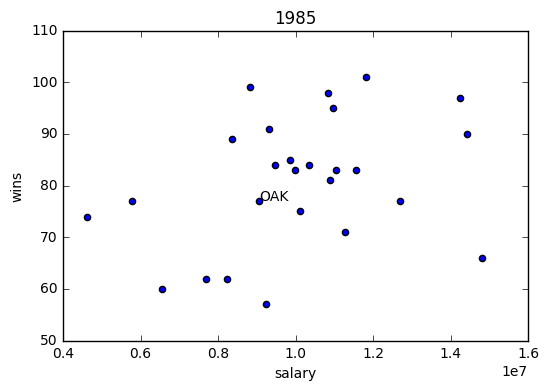

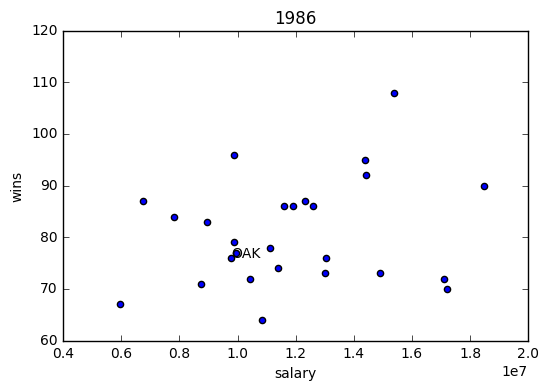

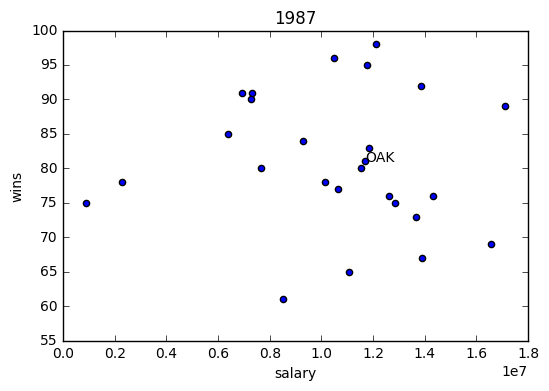

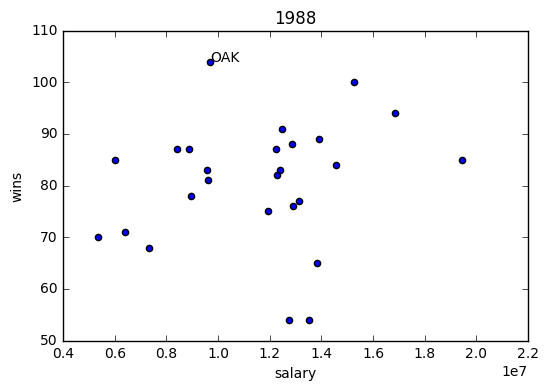

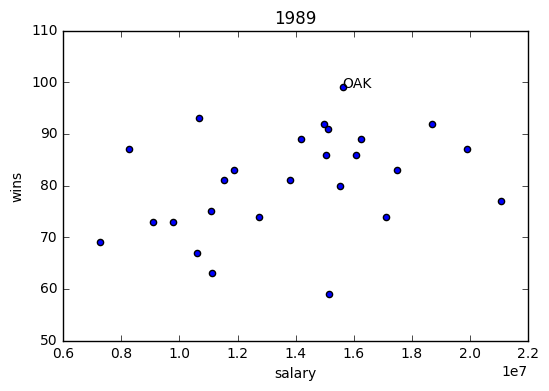

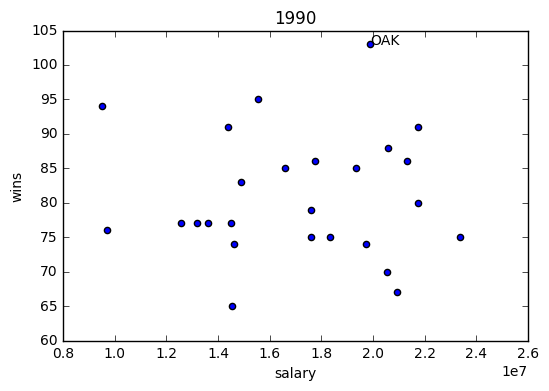

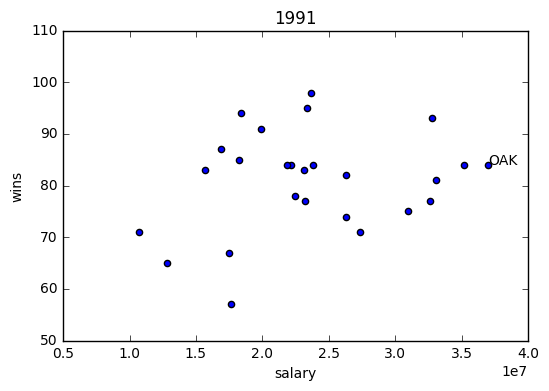

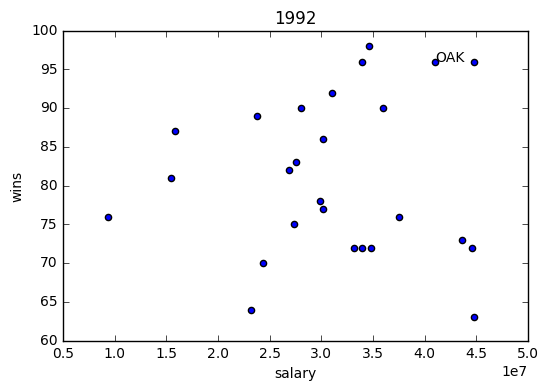

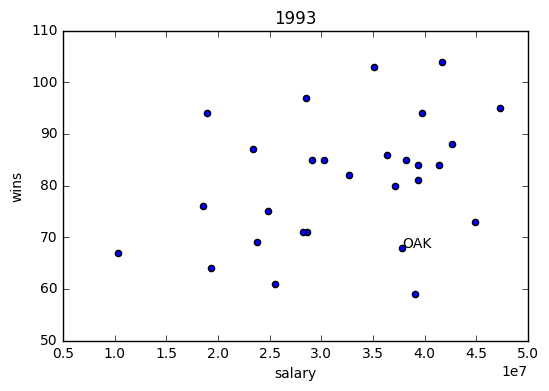

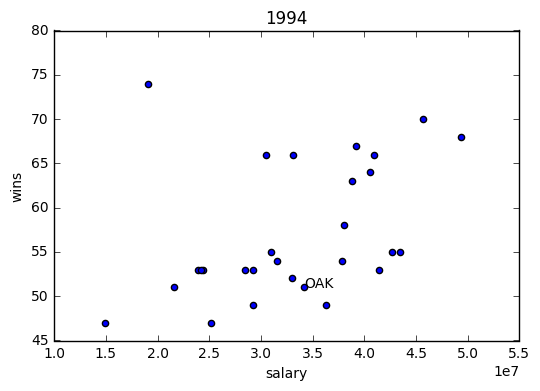

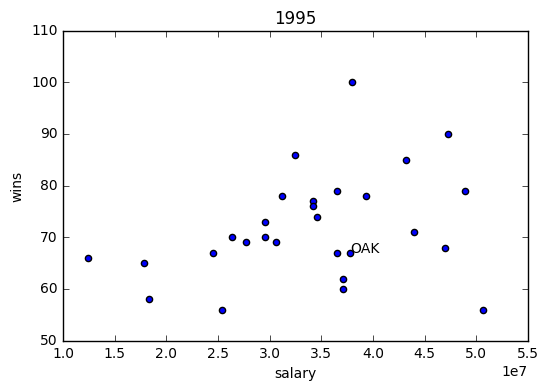

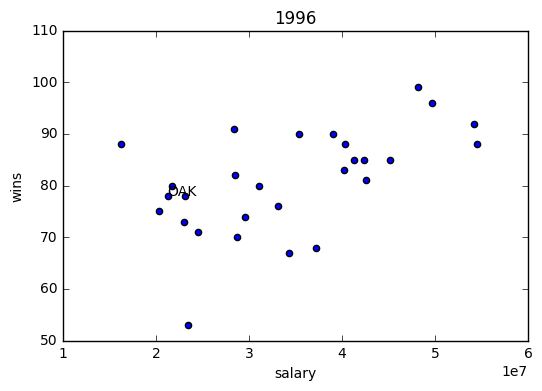

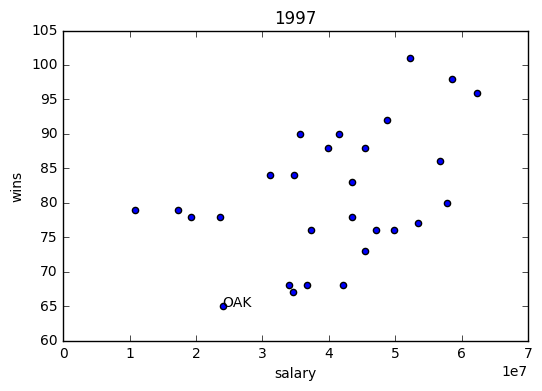

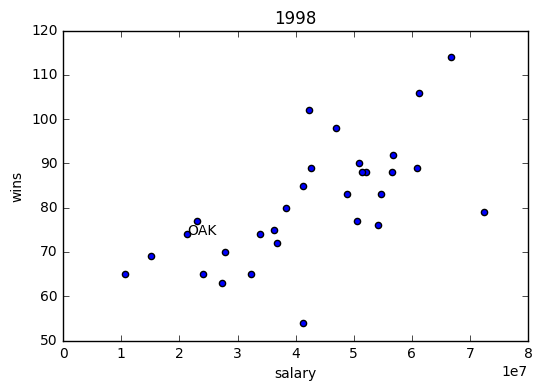

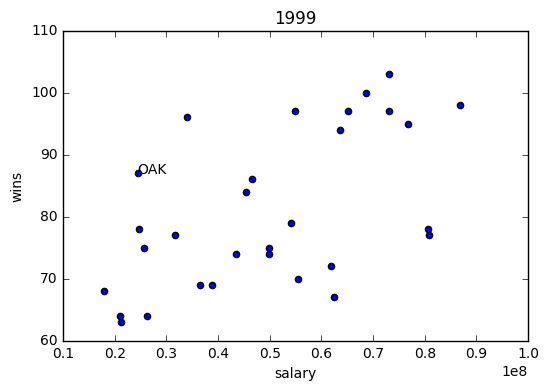

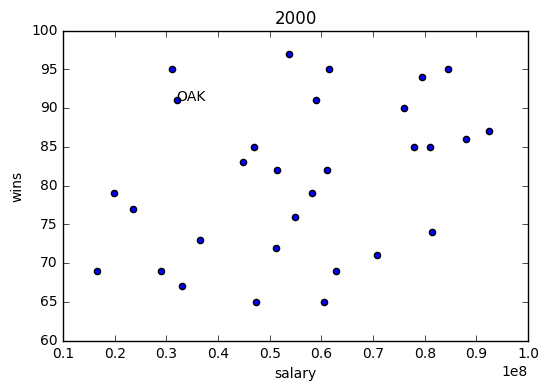

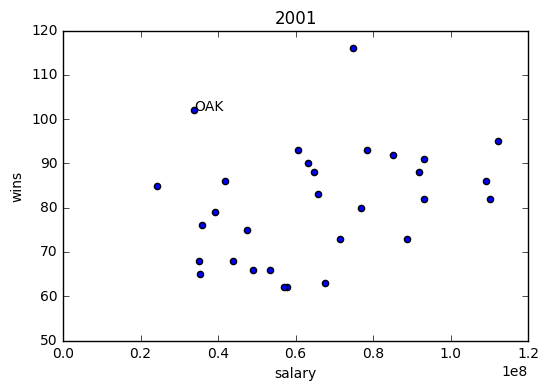

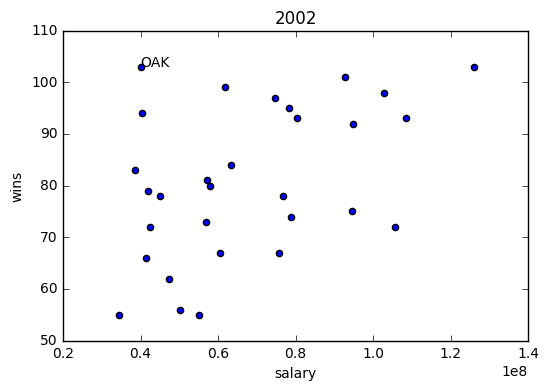

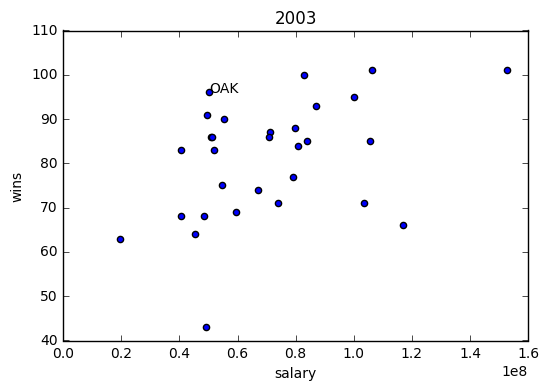

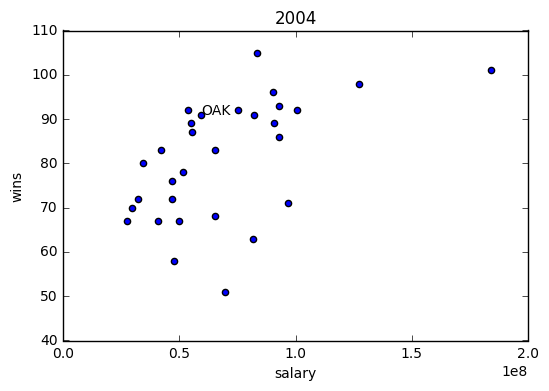

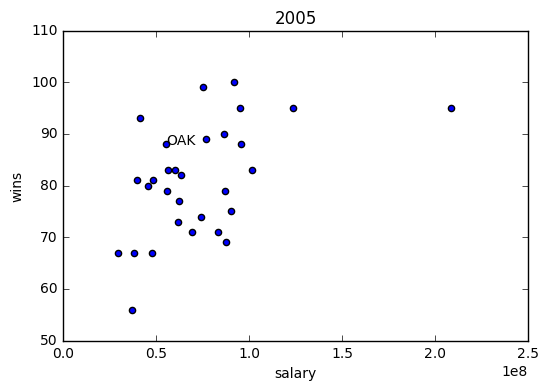

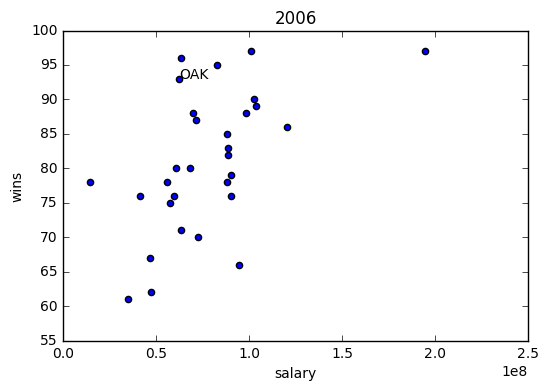

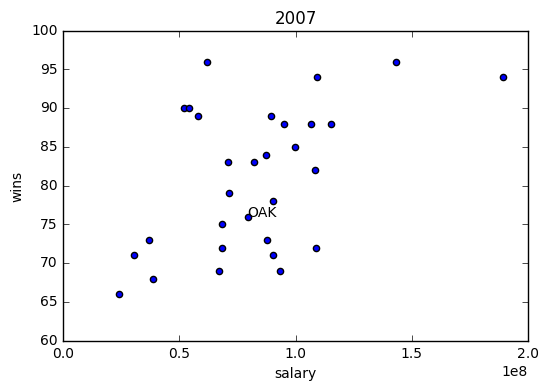

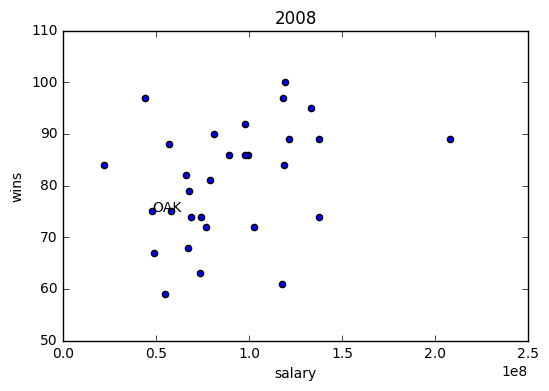

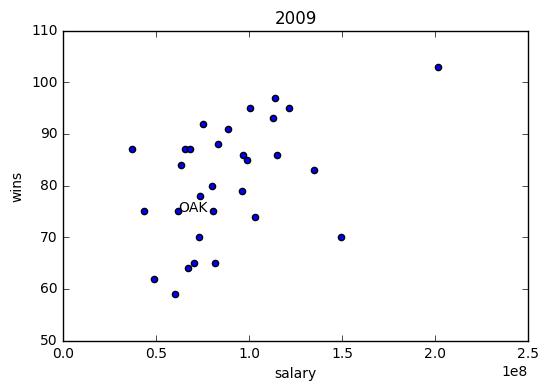

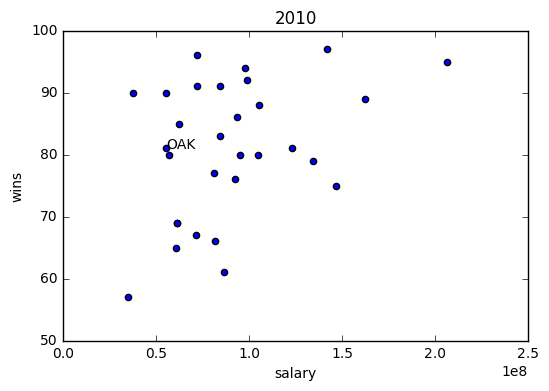

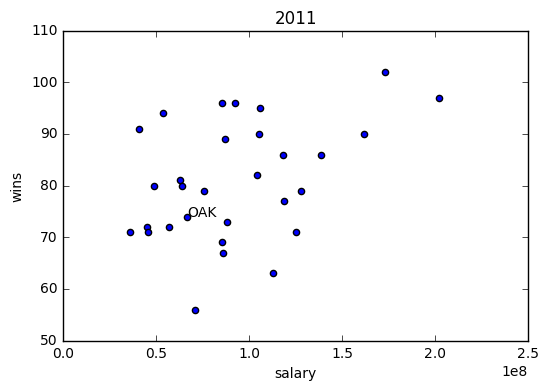

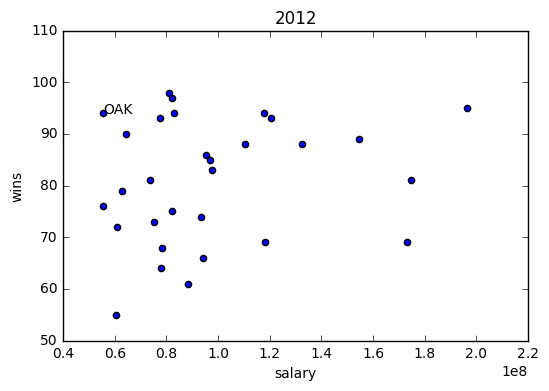

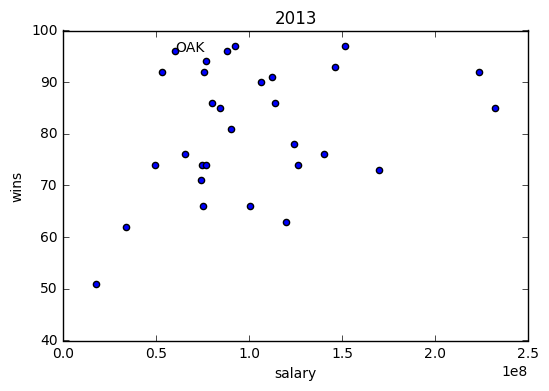

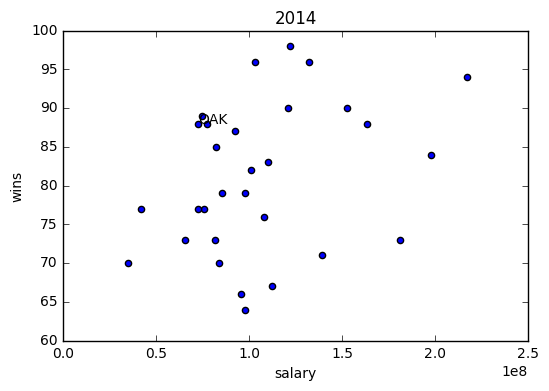

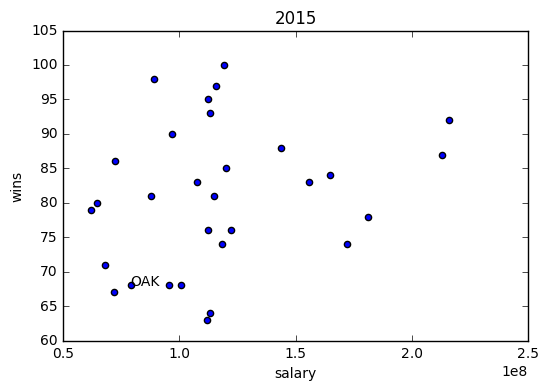

In [94]:
#your code here
for year in teams_salaries['yearID'].unique():
    plt.figure()
    plt.scatter(teams_salaries['salary'][teams_salaries['yearID']==year],
               teams_salaries['W'][teams_salaries['yearID']==year],
               label = teams_salaries['teamID'][teams_salaries['yearID']==year]
               )
    plt.title(year)
    plt.xlabel('salary')
    plt.ylabel('wins')
    plt.annotate('OAK',
                xy = (teams_salaries['salary'][(teams_salaries['yearID']==year) & (teams_salaries['teamID']=='OAK')],
                     teams_salaries['W'][(teams_salaries['yearID']==year) & (teams_salaries['teamID']=='OAK')]
                     ))
    

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [5]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [15]:
#your code here
countries = pd.read_csv('https://raw.githubusercontent.com/mtheartattack/2014_data/master/countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [16]:
#your code here
income = pd.read_excel('https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls')
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [17]:
#your code here
income_t = income.T
income_t.columns = income_t.iloc[0]
income_t = income_t.drop(income_t.index[0])
income_t = income_t.rename(columns = {"GDP per capita": "year"})
## that doesn't work cause gdp per capita is not a column
income_t.head(20)

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN
1804,NaN,603,NaN,668,719,NaN,1206,628,NaN,757,...,NaN,NaN,887,NaN,670,873,NaN,508,NaN,NaN
1805,NaN,603,NaN,668,720,NaN,1208,631,NaN,757,...,NaN,NaN,889,NaN,671,874,NaN,508,NaN,NaN
1806,NaN,603,NaN,668,721,NaN,1210,634,NaN,757,...,NaN,NaN,892,NaN,673,875,NaN,508,NaN,NaN
1807,NaN,603,NaN,668,722,NaN,1212,637,NaN,758,...,NaN,NaN,894,NaN,675,876,NaN,508,NaN,NaN
1808,NaN,603,NaN,668,723,NaN,1215,640,NaN,758,...,NaN,NaN,897,NaN,676,877,NaN,508,NaN,NaN
1809,NaN,603,NaN,668,724,NaN,1217,642,NaN,758,...,NaN,NaN,899,NaN,678,878,NaN,508,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

(array([ 53.,  28.,  15.,  16.,  16.,   9.,  10.,   3.,   4.,   4.,   1.,
          4.,   1.,   3.,   4.,   6.,   5.,   2.,   3.,   2.,   2.,   1.,
          4.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([    473. ,    2708.3,    4943.6,    7178.9,    9414.2,   11649.5,
          13884.8,   16120.1,   18355.4,   20590.7,   22826. ,   25061.3,
          27296.6,   29531.9,   31767.2,   34002.5,   36237.8,   38473.1,
          40708.4,   42943.7,   45179. ,   47414.3,   49649.6,   51884.9,
          54120.2,   56355.5,   58590.8,   60826.1,   63061.4,   65296.7,
          67532. ,   69767.3,   72002.6,   74237.9,   76473.2,   78708.5,
          80943.8,   83179.1,   85414.4,   87649.7,   89885. ,   92120.3,
          94355.6,   96590.9,   98826.2,  101061.5,  103296.8,  105532.1,
         107767.4,  110002.7,  112238. ]),
 <a list of 50 Patch ob

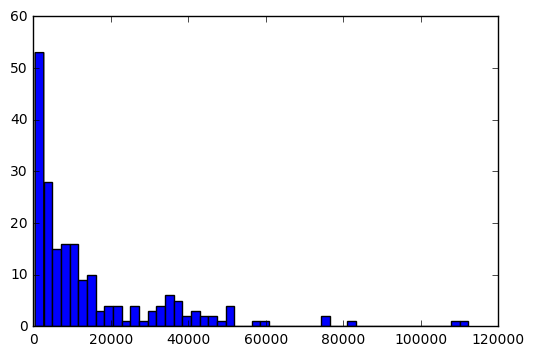

In [18]:
#your code here
plt.hist(income[2000].dropna(), bins = 50)

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [19]:
income.head()
income = income.rename(columns = {'GDP per capita': 'Country'})


In [20]:
income.columns
income.head()

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [21]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    return pd.merge(left = countries, right = income[['Country', year]],
                   left_on = 'Country', right_on = 'Country').rename(columns = {year: 'Income'})

In [22]:
mergeByYear(2011)

,Country,Region,Income
0,Algeria,AFRICA,12606.0
1,Angola,AFRICA,7094.0
2,Benin,AFRICA,1643.0
3,Botswana,AFRICA,14341.0
4,Burundi,AFRICA,731.0
5,Cameroon,AFRICA,2610.0
6,Cape Verde,AFRICA,6206.0
7,Central African Republic,AFRICA,913.0
8,Chad,AFRICA,1896.0
9,Comoros,AFRICA,1427.0


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

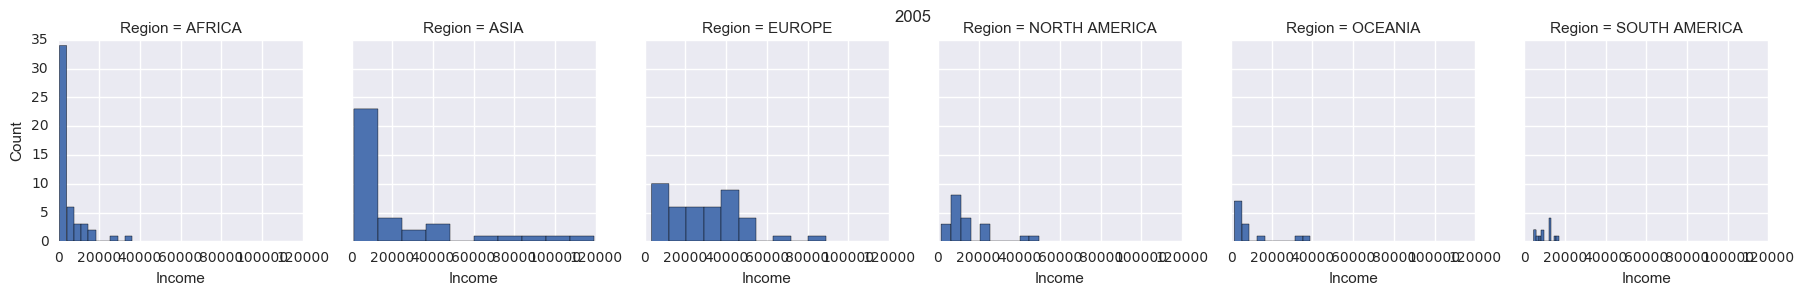

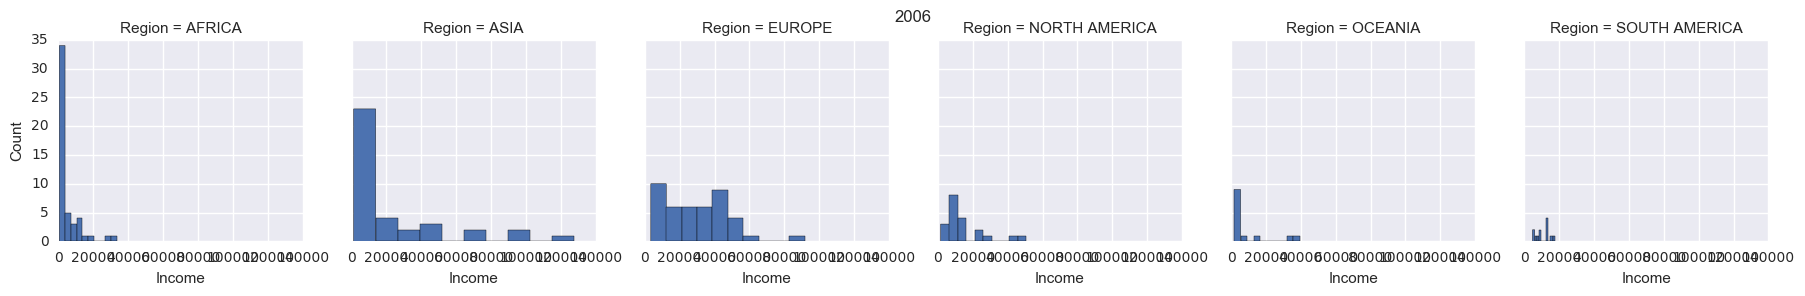

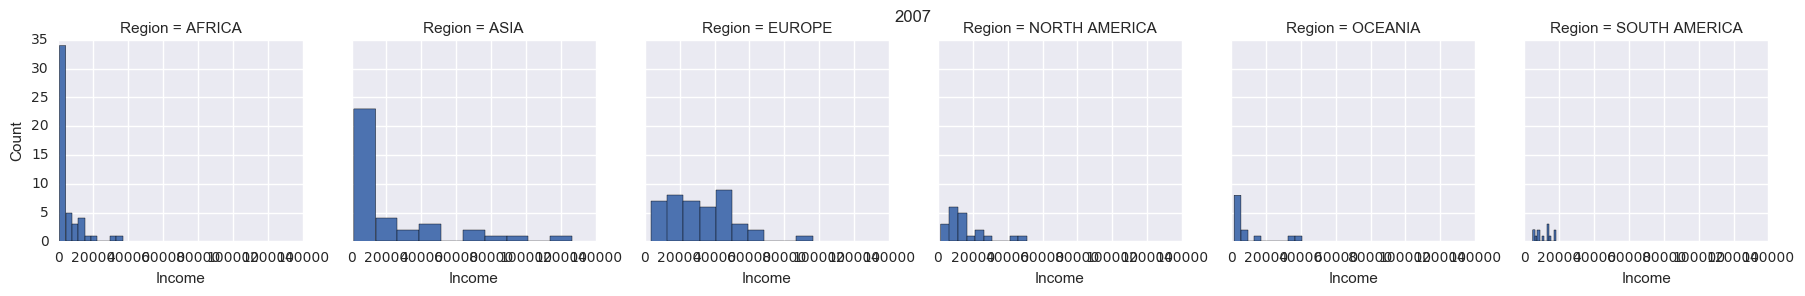

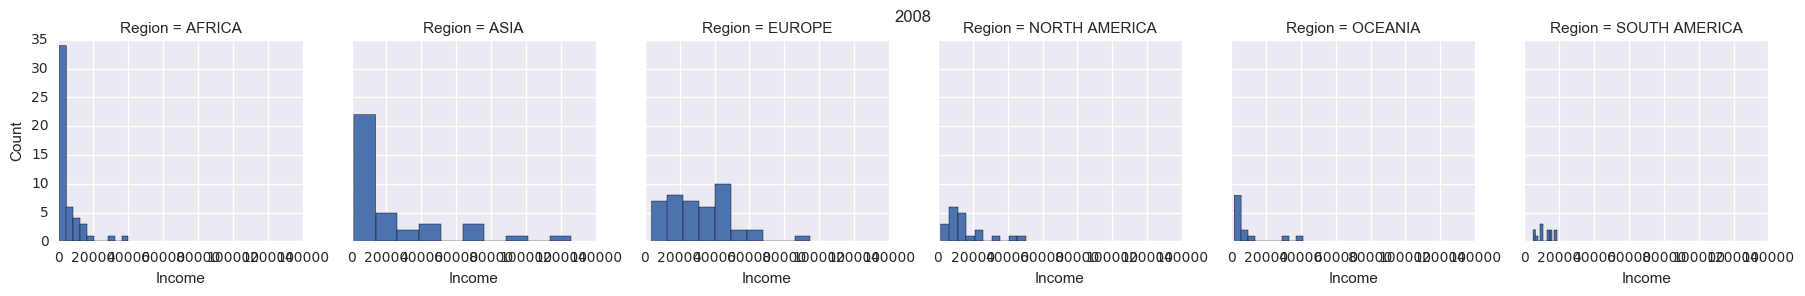

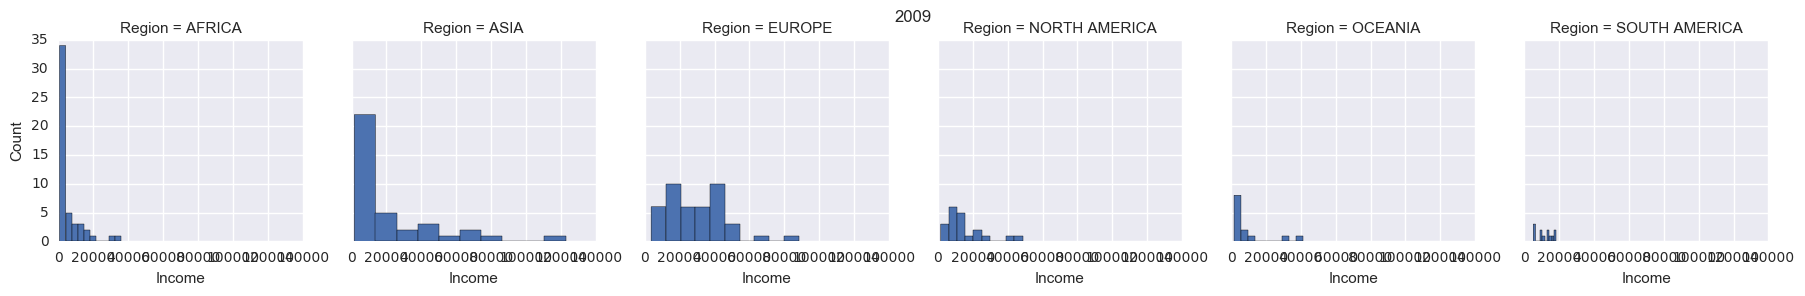

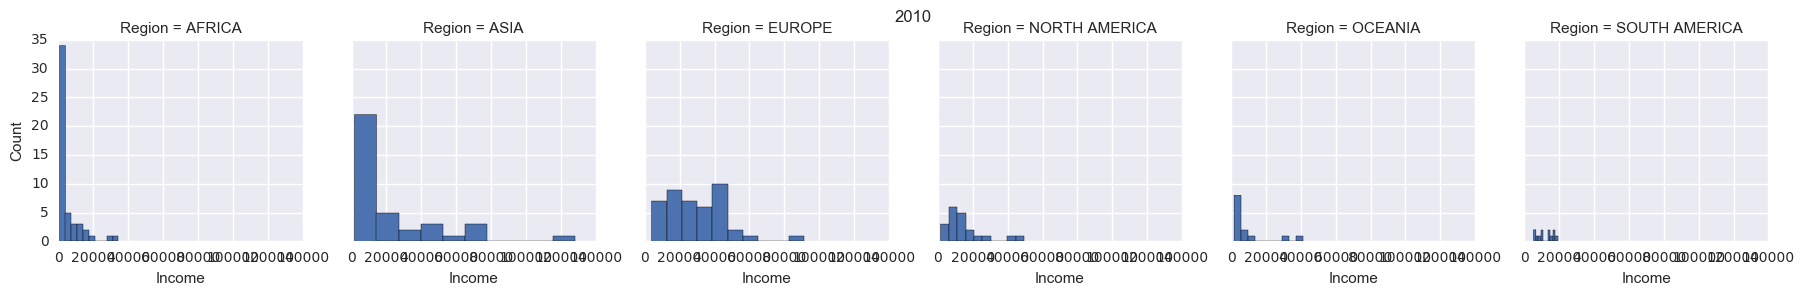

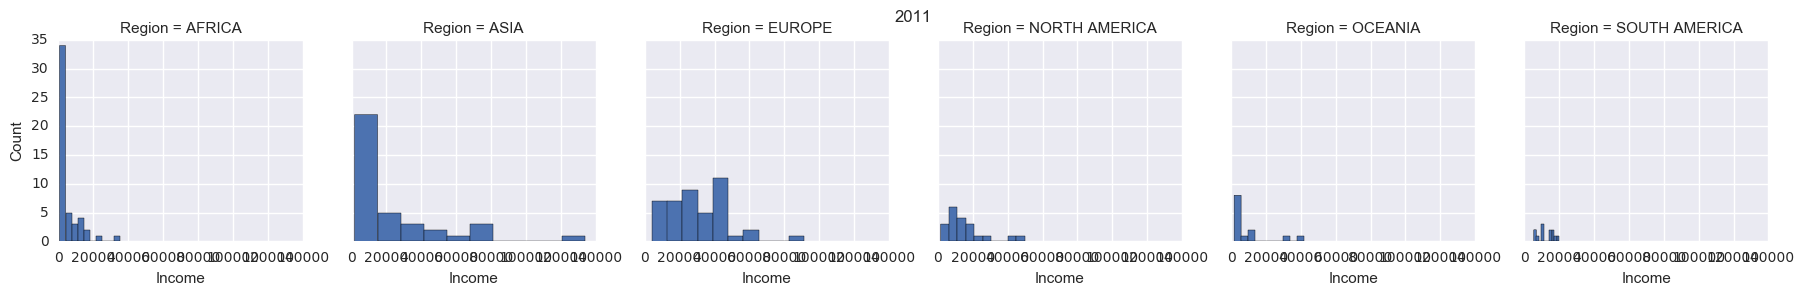

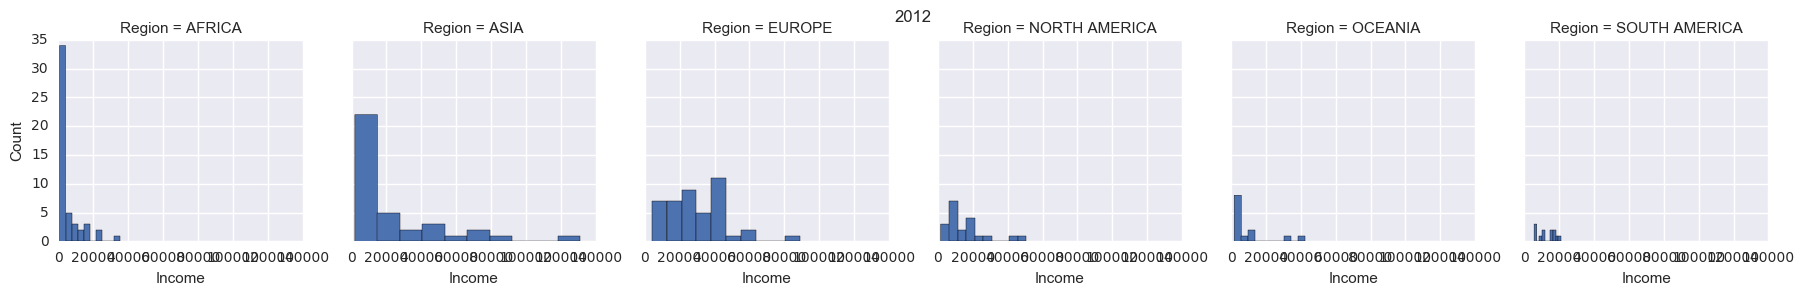

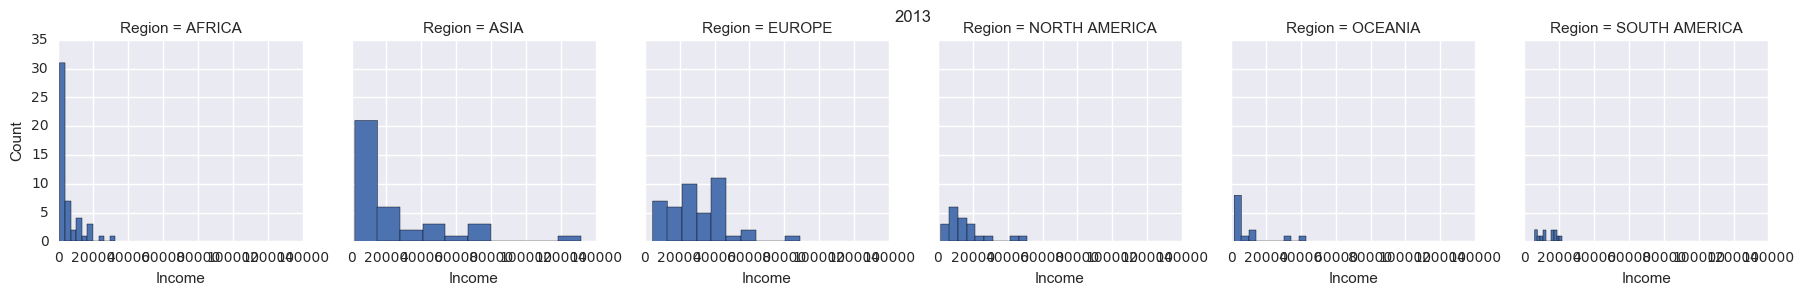

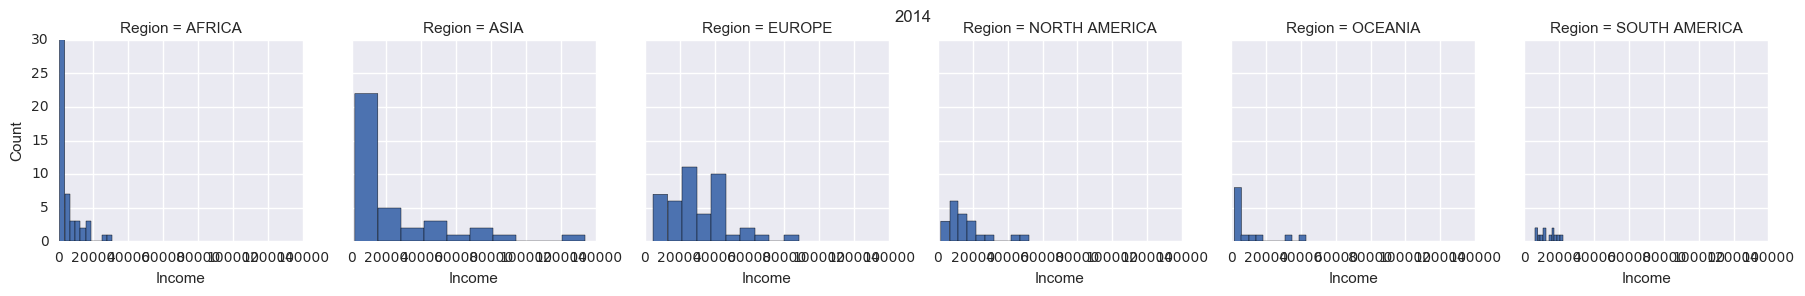

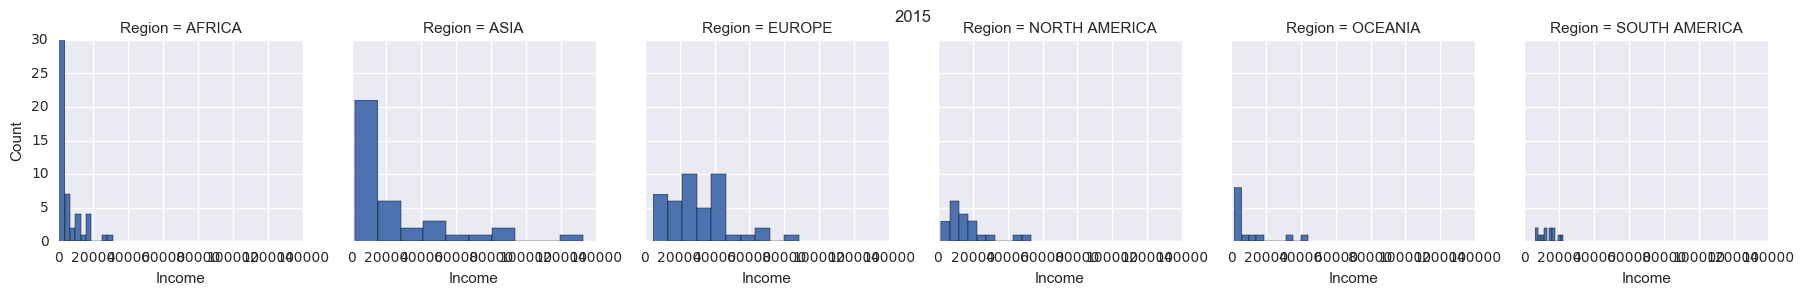

In [23]:
#your code here
import seaborn as sns
for year in xrange(2005, 2016):
    g = sns.FacetGrid(mergeByYear(year), col = 'Region')
    g.map(plt.hist, 'Income')
    g.set_axis_labels('Income', 'Count')
    ## add title
    g.fig.suptitle(str(year))

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [14]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
from scipy import stats
print stats.norm.cdf(loc=0, scale = 1, x=1.96)

def ratioNormals(diff, a):
    return float(stats.norm.sf(loc = diff, scale = 1, x = a))/stats.norm.sf(loc = 0, scale = 1, x = a)


0.975002104852


#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [28]:
#your code here
income_avg_2012 = mergeByYear(2012)[mergeByYear(2012)['Region'].isin(['ASIA', 'SOUTH AMERICA'])].groupby(['Region'])['Income'].mean().reset_index()
income_avg_2012

,Region,Income
0,ASIA,23500.432432
1,SOUTH AMERICA,13015.750000


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [36]:
#your code here
## to name groupby.agg just use a dictionary format
mergeByYear(2012)[mergeByYear(2012)['Region'].isin(['ASIA', 'SOUTH AMERICA'])].groupby(['Region'])['Income'].agg({'Prop_greater_1000': lambda x: np.mean(x>10000)}).reset_index()

,Region,Prop_greater_1000
0,ASIA,0.567568
1,SOUTH AMERICA,0.750000


#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
